# Leverage points

Model with Mansions:
Intercept: -225040.03
House Size Coefficient: 114.5881



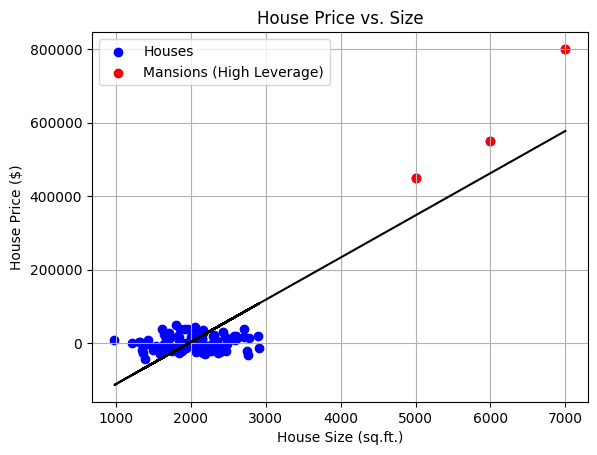

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(0)
house_size = np.random.normal(2000, 400, 100)  # average house around 2000 sq.ft.
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Add a few mansions
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])  # not necessarily following the previous linear trend

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

# Printing parameters for the model with mansions
print("Model with Mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"House Size Coefficient: {model.params[1]:.4f}\n")

# Plot the data and the regression line
plt.scatter(house_size, house_price, color='blue', label='Houses')
plt.scatter(house_size[-3:], house_price[-3:], color='red', label='Mansions (High Leverage)')
plt.plot(house_size, model.params[0] + model.params[1] * house_size, color='black')
plt.title('House Price vs. Size')
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Model without Mansions:
Intercept: -9866.78
House Size Coefficient: 6.2349


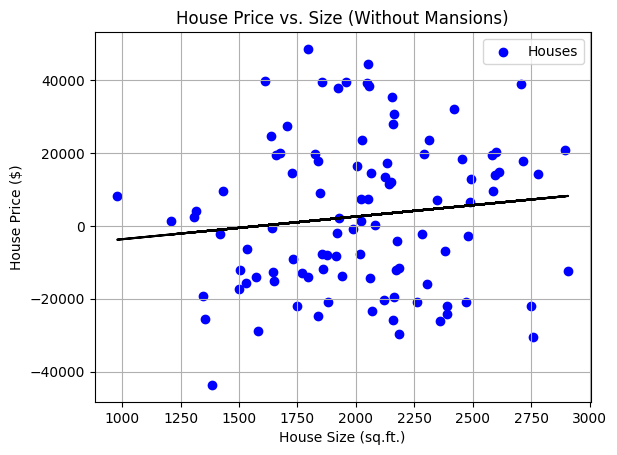

In [3]:
# Generate synthetic data (without the mansions)
np.random.seed(0)
house_size = np.random.normal(2000, 400, 100)  # average house around 2000 sq.ft.
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Fit a linear regression model
X = sm.add_constant(house_size)
model_without_mansions = sm.OLS(house_price, X).fit()

# Printing parameters for the model without mansions
print("Model without Mansions:")
print(f"Intercept: {model_without_mansions.params[0]:.2f}")
print(f"House Size Coefficient: {model_without_mansions.params[1]:.4f}")

# Plot the data and the regression line
plt.scatter(house_size, house_price, color='blue', label='Houses')
plt.plot(house_size, model_without_mansions.params[0] + model_without_mansions.params[1] * house_size, color='black')
plt.title('House Price vs. Size (Without Mansions)')
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()


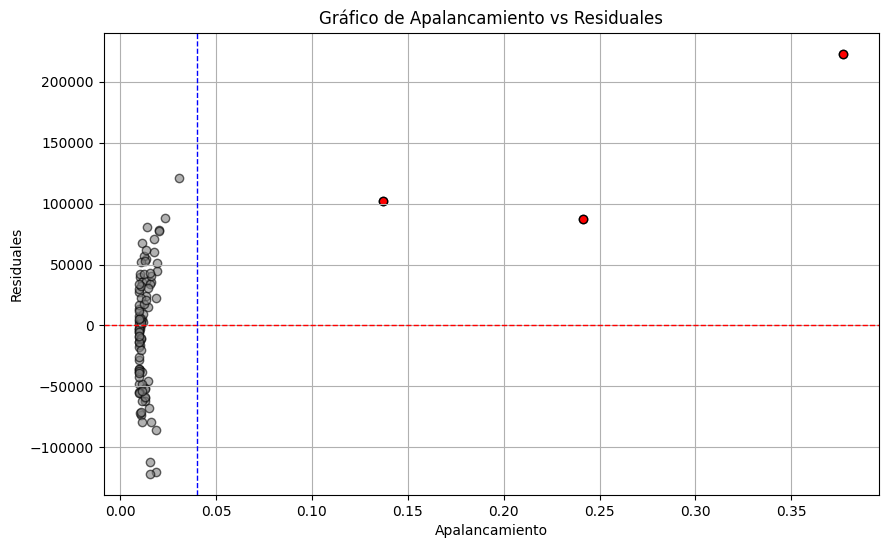

Observaciones con alto apalancamiento: [100 101 102]
Valores de apalancamiento: [0.13694378 0.24146323 0.37708716]


In [4]:
# Obtener valores de apalancamiento (diagonal de la matriz H) y residuales
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Calcular el umbral para puntos de apalancamiento alto
n = len(house_price)
p = X.shape[1]  # número de predictores + intercepto
threshold = 2 * p / n

# Gráfico de apalancamiento vs residuales
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolor='k', facecolor='gray', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(threshold, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Apalancamiento')
plt.ylabel('Residuales')
plt.title('Gráfico de Apalancamiento vs Residuales')
plt.grid(True)

# Resaltar puntos con alto apalancamiento (mansiones)
high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], edgecolor='k', facecolor='red')

plt.show()

# Imprimir puntos con alto apalancamiento
print(f"Observaciones con alto apalancamiento: {high_leverage_points}")
print(f"Valores de apalancamiento: {leverage[high_leverage_points]}")

# Exercise 1

Use the Boston Housing dataset, analyze it, and identify its leverage points. This dataset is available in the seaborn library.

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


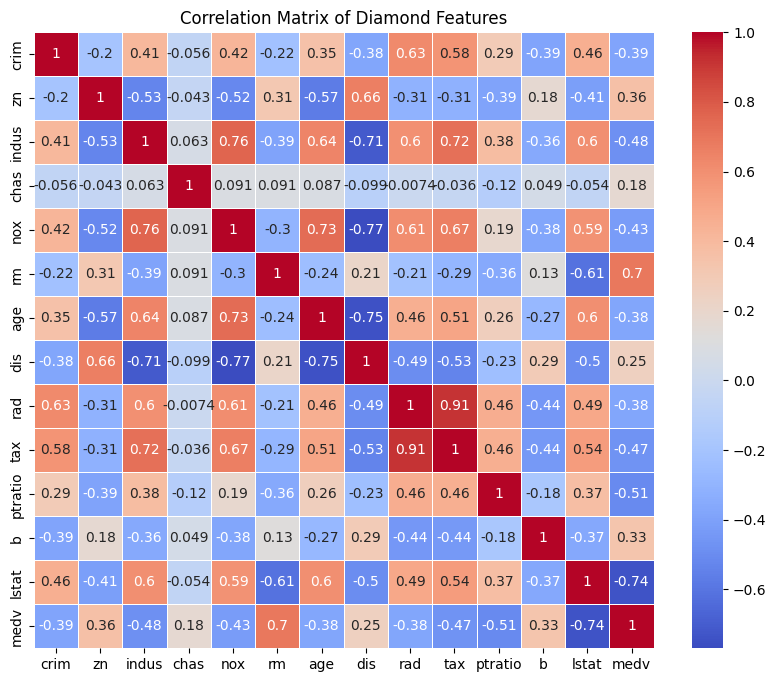

In [7]:
import pandas as pd
import seaborn as sns

# Load the Boston Housing dataset from a URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

# Display the first few rows of the dataset
print(boston.head())

# Create a correlation matrix
corr_matrix = boston.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diamond Features')
plt.show()

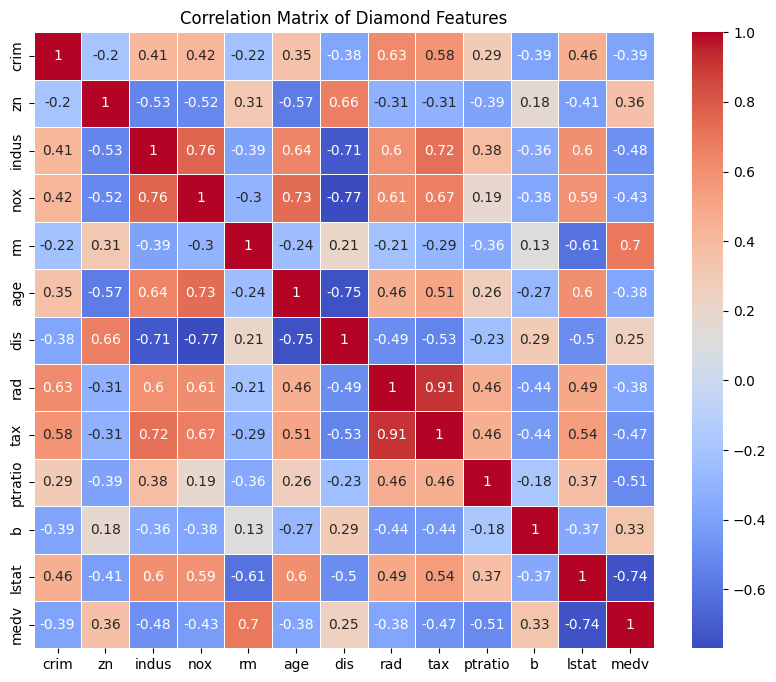

In [11]:
# Clean non correlated vars
new_boston = boston.drop(columns=['chas'])

# Create a second correlation matrix
corr_matrix = new_boston.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diamond Features')
plt.show()

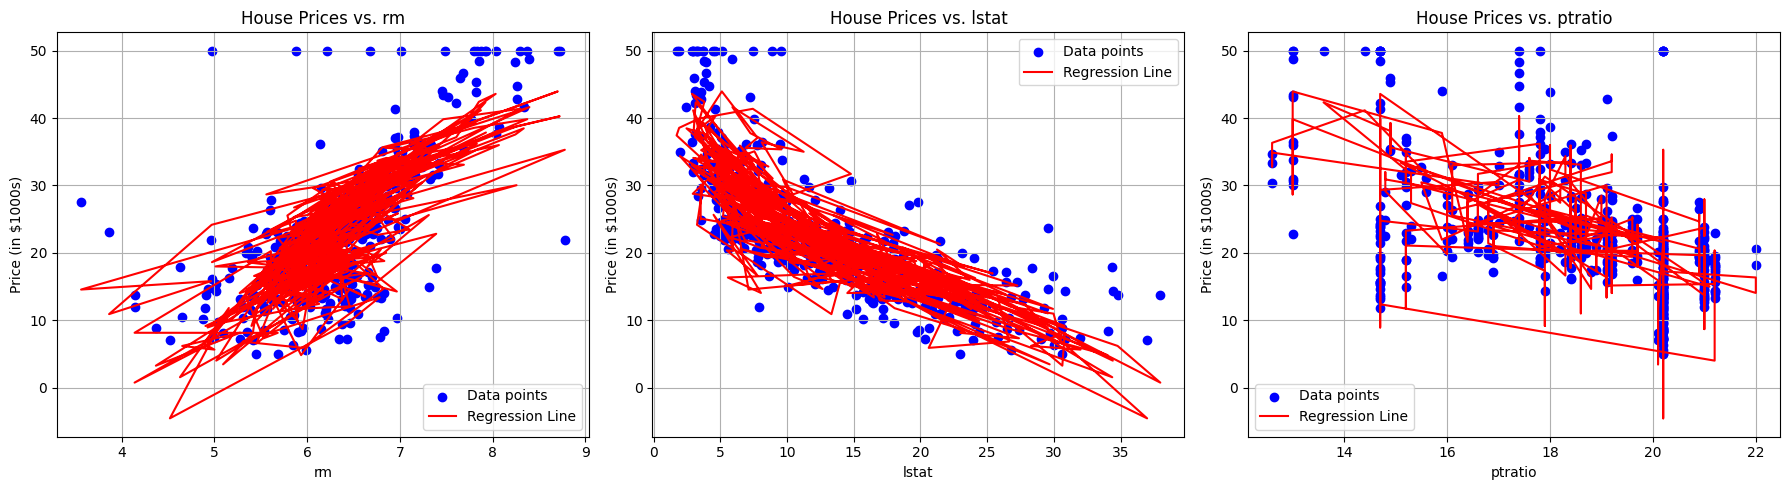

In [12]:
# Prepare the data
X = new_boston.drop(columns=['medv'])
y = new_boston['medv']

# Fit linear model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Features to analyze
features = ['rm', 'lstat', 'ptratio']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(features):
    axs[i].scatter(new_boston[feature], y, color='blue', label='Data points')
    axs[i].plot(new_boston[feature], model.predict(X), color='red', label='Regression Line')
    axs[i].set_title(f'House Prices vs. {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price (in $1000s)')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

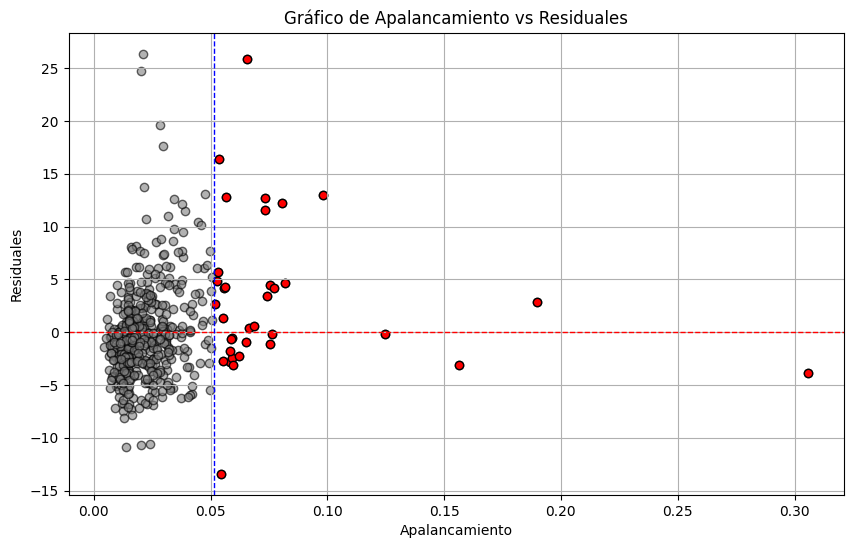

Observaciones con alto apalancamiento: [  8 120 121 122 123 124 125 126 144 145 147 152 155 156 214 253 353 354
 355 364 365 367 368 380 405 410 412 414 418 427 488 489 490 491 492]
Valores de apalancamiento: [0.05276098 0.05927325 0.05823562 0.05881469 0.06652192 0.05907575
 0.05842624 0.06873447 0.0521002  0.05529753 0.05301473 0.0551682
 0.06198225 0.0651163  0.07335662 0.05680252 0.07530687 0.05571787
 0.05597522 0.05466545 0.09818778 0.08040706 0.06573362 0.30590219
 0.15639554 0.12467592 0.05377655 0.07350098 0.1898084  0.05961029
 0.07418698 0.07562469 0.08185654 0.07645185 0.07710984]


In [13]:
# Obtener valores de apalancamiento (diagonal de la matriz H) y residuales
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Calcular el umbral para puntos de apalancamiento alto
n = len(y)
p = X.shape[1]  # número de predictores + intercepto
threshold = 2 * p / n

# Gráfico de apalancamiento vs residuales
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolor='k', facecolor='gray', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(threshold, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Apalancamiento')
plt.ylabel('Residuales')
plt.title('Gráfico de Apalancamiento vs Residuales')
plt.grid(True)

# Resaltar puntos con alto apalancamiento (mansiones)
high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], edgecolor='k', facecolor='red')

plt.show()

# Imprimir puntos con alto apalancamiento
print(f"Observaciones con alto apalancamiento: {high_leverage_points}")
print(f"Valores de apalancamiento: {leverage[high_leverage_points]}")

# Exercise 2

Use the diamonds dataset, analyze it, and identify its leverage points. This dataset is available in the seaborn library.

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


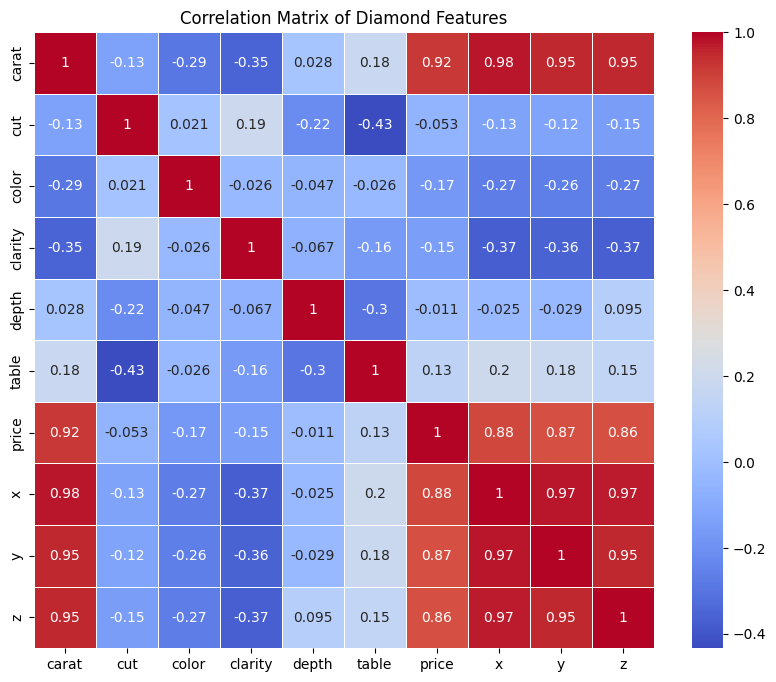

In [14]:
diamonds = sns.load_dataset("diamonds")
print(diamonds.head())

# Mappings
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

diamonds['cut'] = diamonds['cut'].map(cut_mapping)
diamonds['color'] = diamonds['color'].map(color_mapping)
diamonds['clarity'] = diamonds['clarity'].map(clarity_mapping)

# Create a correlation matrix
corr_matrix = diamonds.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diamond Features')
plt.show()

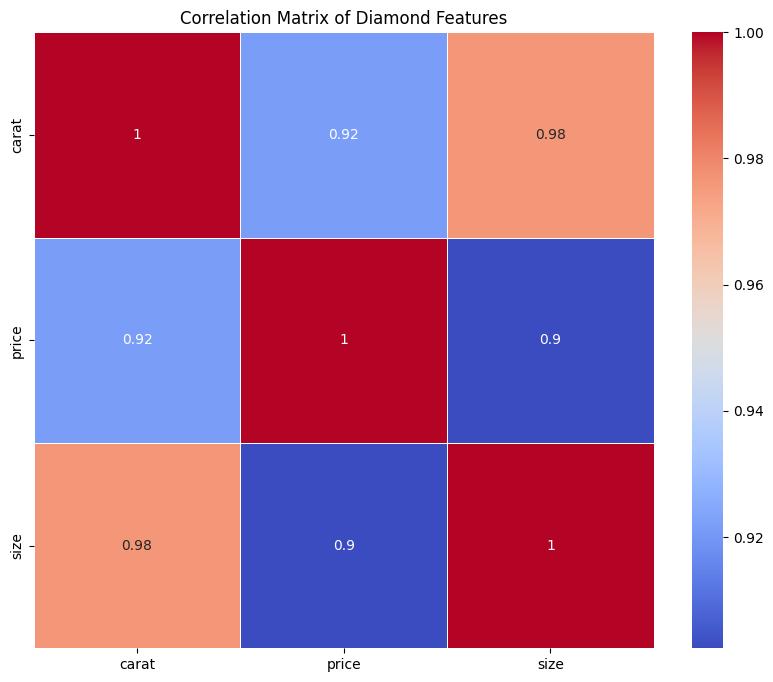

In [15]:
# Drop low correlations with price
new_diamonds = diamonds.drop(columns=['color', 'clarity', 'depth', 'table', 'cut'])
new_diamonds['size'] = diamonds['x'] * diamonds['y'] * diamonds['z']
new_diamonds = new_diamonds.drop(columns=['x', 'y', 'z'])

# Create a second correlation matrix
corr_matrix = new_diamonds.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diamond Features')
plt.show()

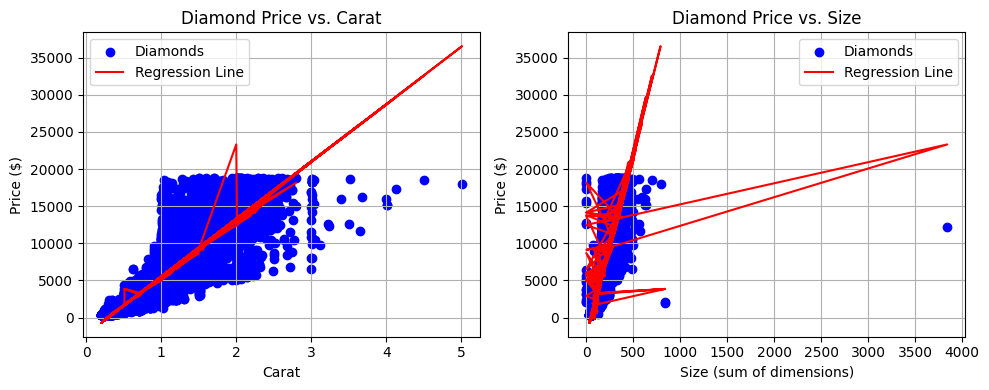

In [16]:
# Prepare the data
X = new_diamonds.drop(columns=['price'])
y = new_diamonds['price']

# Fit linear model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot for carat
axs[0].scatter(new_diamonds['carat'], y, color='blue', label='Diamonds')
axs[0].plot(new_diamonds['carat'], model.fittedvalues, color='red', label='Regression Line')
axs[0].set_title('Diamond Price vs. Carat')
axs[0].set_xlabel('Carat')
axs[0].set_ylabel('Price ($)')
axs[0].legend()
axs[0].grid(True)

# Plot for size
axs[1].scatter(new_diamonds['size'], y, color='blue', label='Diamonds')
axs[1].plot(new_diamonds['size'], model.fittedvalues, color='red', label='Regression Line')
axs[1].set_title('Diamond Price vs. Size')
axs[1].set_xlabel('Size (sum of dimensions)')
axs[1].set_ylabel('Price ($)')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

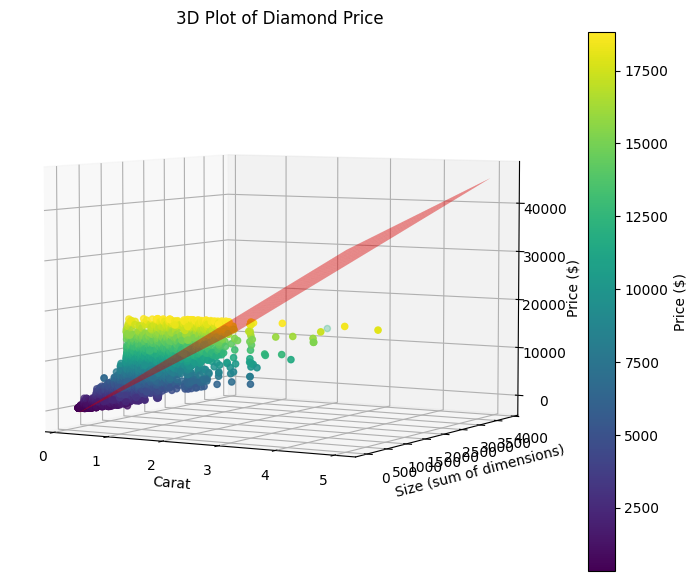

In [17]:
from matplotlib import cm

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Normalize the prices for coloring
norm = plt.Normalize(new_diamonds['price'].min(), new_diamonds['price'].max())
colors = cm.viridis(norm(new_diamonds['price']))  # Use the Viridis colormap

# Scatter plot for actual data with color gradient
sc = ax.scatter(new_diamonds['carat'], new_diamonds['size'], y, color=colors, label='Diamonds')

# Create a mesh grid for the regression plane
carat_range = np.linspace(new_diamonds['carat'].min(), new_diamonds['carat'].max(), 100)
size_range = np.linspace(new_diamonds['size'].min(), new_diamonds['size'].max(), 100)
carat_grid, size_grid = np.meshgrid(carat_range, size_range)

# Calculate the corresponding prices from the model
price_grid = model.params['const'] + model.params['carat'] * carat_grid + model.params['size'] * size_grid

# Plot the regression plane
ax.plot_surface(carat_grid, size_grid, price_grid, color='red', alpha=0.5, label='Regression Plane')

# Set titles and labels
ax.set_title('3D Plot of Diamond Price')
ax.set_xlabel('Carat')
ax.set_ylabel('Size (sum of dimensions)')
ax.set_zlabel('Price ($)')

# Change the viewing angle
ax.view_init(elev=5)

# Add a color bar
m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
m.set_array([])
plt.colorbar(m, ax=ax, label='Price ($)')
plt.show()

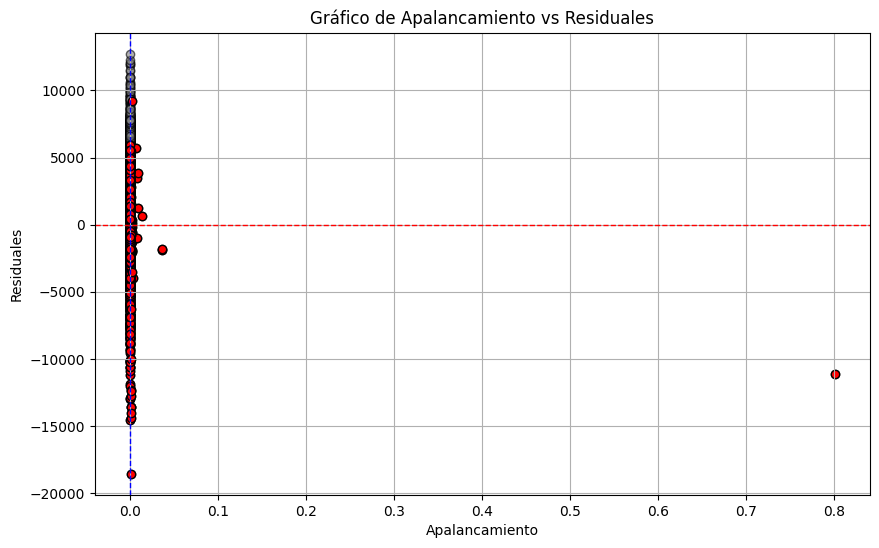

Observaciones con alto apalancamiento: [ 2207  2274  2314 ... 49905 49915 51506]
Valores de apalancamiento: [0.00172789 0.00055268 0.00176226 ... 0.00016232 0.00011169 0.00216355]


In [18]:
# Obtener valores de apalancamiento (diagonal de la matriz H) y residuales
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Calcular el umbral para puntos de apalancamiento alto
n = len(y)
p = X.shape[1]  # número de predictores + intercepto
threshold = 2 * p / n

# Gráfico de apalancamiento vs residuales
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolor='k', facecolor='gray', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(threshold, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Apalancamiento')
plt.ylabel('Residuales')
plt.title('Gráfico de Apalancamiento vs Residuales')
plt.grid(True)

# Resaltar puntos con alto apalancamiento (mansiones)
high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], edgecolor='k', facecolor='red')

plt.show()

# Imprimir puntos con alto apalancamiento
print(f"Observaciones con alto apalancamiento: {high_leverage_points}")
print(f"Valores de apalancamiento: {leverage[high_leverage_points]}")